# General notes
First, I created a smaller dataset using createsmalldata.ipynb.  
Then, trained model using an original dataset.  
The notebook was run on Kaggle.  
Then the best model was saved to .h5, downloaded to the local computer.  
The .h5 file was converted to the saved model.  
The fodler with the saved model was moved to the capstone1-code folder.  
It was done to have two separate pipenv environments  

# EDA

### Show the folder structure

In [1]:
import numpy as np
import pandas as pd


# Path to the dataset.

#basedir = './data/small'
#basedir = './data/big'
basedir = '/kaggle/input/tomato'

import os
for dirname, _, filenames in os.walk(basedir):
    print(dirname)


/kaggle/input/tomato
/kaggle/input/tomato/valid
/kaggle/input/tomato/valid/Late_blight
/kaggle/input/tomato/valid/Tomato_Yellow_Leaf_Curl_Virus
/kaggle/input/tomato/valid/Septoria_leaf_spot
/kaggle/input/tomato/valid/Early_blight
/kaggle/input/tomato/valid/Spider_mites Two-spotted_spider_mite
/kaggle/input/tomato/valid/powdery_mildew
/kaggle/input/tomato/valid/healthy
/kaggle/input/tomato/valid/Bacterial_spot
/kaggle/input/tomato/valid/Target_Spot
/kaggle/input/tomato/valid/Tomato_mosaic_virus
/kaggle/input/tomato/valid/Leaf_Mold
/kaggle/input/tomato/train
/kaggle/input/tomato/train/Late_blight
/kaggle/input/tomato/train/Tomato_Yellow_Leaf_Curl_Virus
/kaggle/input/tomato/train/Septoria_leaf_spot
/kaggle/input/tomato/train/Early_blight
/kaggle/input/tomato/train/Spider_mites Two-spotted_spider_mite
/kaggle/input/tomato/train/powdery_mildew
/kaggle/input/tomato/train/healthy
/kaggle/input/tomato/train/Bacterial_spot
/kaggle/input/tomato/train/Target_Spot
/kaggle/input/tomato/train/Tomato

### Build dict with image metadata

In [2]:
from PIL import Image

In [3]:
folder_train = basedir + '/train'
folder_valid = basedir + '/valid'

def get_image_stat(path_to_images):
    d = {}
    i = 0
    d['full_path'] = []
    d['file_name'] = []
    d['class_name'] = []
    d['width'] = []
    d['height'] = []
    for dirname, _, filenames in os.walk(path_to_images):
        for filename in filenames:
            _, classname = os.path.split(dirname)
            w, h = Image.open(os.path.join(dirname,filename)).size
            d['full_path'].append(os.path.join(dirname,filename))
            d['width'].append(w)
            d['height'].append(h)
            d['file_name'].append(filename)
            d['class_name'].append(classname)           
    return d

### Convert dict to the DataFrame

In [4]:
dictStat = get_image_stat(folder_train)
df = pd.DataFrame(dictStat)
df['width_avg'] = df.groupby(['class_name'])['width'].transform(lambda x: x.mean())
df['height_avg'] = df.groupby(['class_name'])['height'].transform(lambda x: x.mean())

In [5]:
#classmap = dict(zip(df['class_name'].unique(), np.arange(df['class_name'].nunique())))
#df['class'] = df.apply(lambda r: classmap[r['class_name']], axis=1)

In [5]:
import matplotlib.pyplot as plt

### Print the first 5 rows from the dataset

In [6]:
df.head()

,full_path,file_name,class_name,width,height,width_avg,height_avg
0,/kaggle/input/tomato/train/Late_blight/LB_ (13...,LB_ (135).JPG,Late_blight,256,256,322.526502,328.899454
1,/kaggle/input/tomato/train/Late_blight/781e93a...,781e93a9-2059-42de-8075-658033a6abf7___RS_Late...,Late_blight,256,256,322.526502,328.899454
2,/kaggle/input/tomato/train/Late_blight/1e0c01b...,1e0c01b6-5d75-47ea-b455-c9508882424a___RS_Late...,Late_blight,256,256,322.526502,328.899454
3,/kaggle/input/tomato/train/Late_blight/110822-...,110822-206-Tomato-blight_jpg.rf.f18f78f7d7bb26...,Late_blight,640,640,322.526502,328.899454
4,/kaggle/input/tomato/train/Late_blight/283ff0b...,283ff0be-6e5e-4b4e-bf21-639780b77ffc___GHLB2 L...,Late_blight,256,256,322.526502,328.899454


### Plot the number of images per class

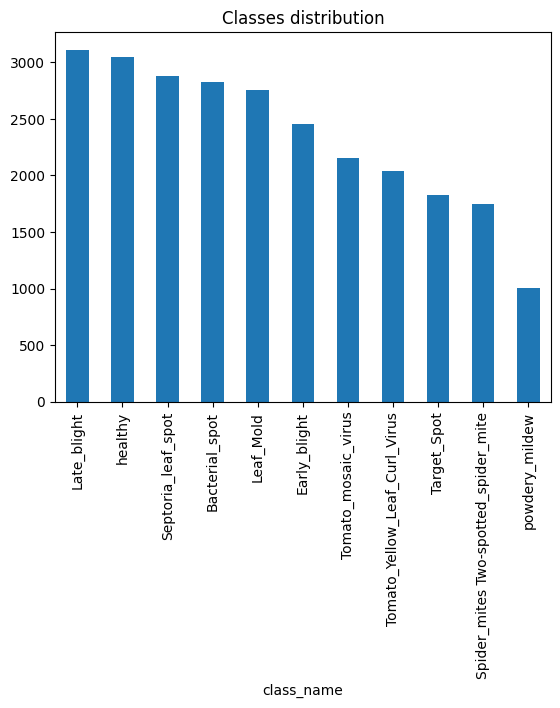

In [7]:
df['class_name'].value_counts().plot(kind='bar', title='Classes distribution')
plt.show()

### Print image dimensions

In [8]:
df.groupby('class_name').agg({'width': ['mean', 'max', 'min'], 'height': ['mean', 'max', 'min']})

width                 height        \
                                            mean   max  min        mean   max   
class_name                                                                      
Bacterial_spot                        290.974168  2048  150  319.382873  1536   
Early_blight                          307.554379  3872  150  299.515275  2592   
Late_blight                           322.526502  4416  225  328.899454  3370   
Leaf_Mold                             286.168482  6000  150  283.819172  6000   
Septoria_leaf_spot                    324.625954  3264  142  340.113463  3072   
Spider_mites Two-spotted_spider_mite  257.318832   640  256  257.318832   640   
Target_Spot                           256.000000   256  256  256.000000   256   
Tomato_Yellow_Leaf_Curl_Virus         270.689554   640  256  270.689554   640   
Tomato_mosaic_virus                   309.459359  3648  130  337.422202  2736   
healthy                               292.833497  4000  168  310.639462  3000   
powdery_mildew                        227.000000   227  227  227.000000   227   

                                           
                                      min  
class_name                                 
Bacterial_spot                        147  
Early_blight                          150  
Late_blight                           154  
Leaf_Mold                             137  
Septoria_leaf_spot                    139  
Spider_mites Two-spotted_spider_mite  256  
Target_Spot                           256  
Tomato_Yellow_Leaf_Curl_Virus         256  
Tomato_mosaic_virus                    69  
healthy                               183  
powdery_mildew                        227

### Plot 3 random images per class

In [9]:
num_rows = df['class_name'].nunique()
sample_num = 3
images_per_row = sample_num
df_sample = df.groupby('class_name').sample(n=sample_num, random_state=11).reset_index()

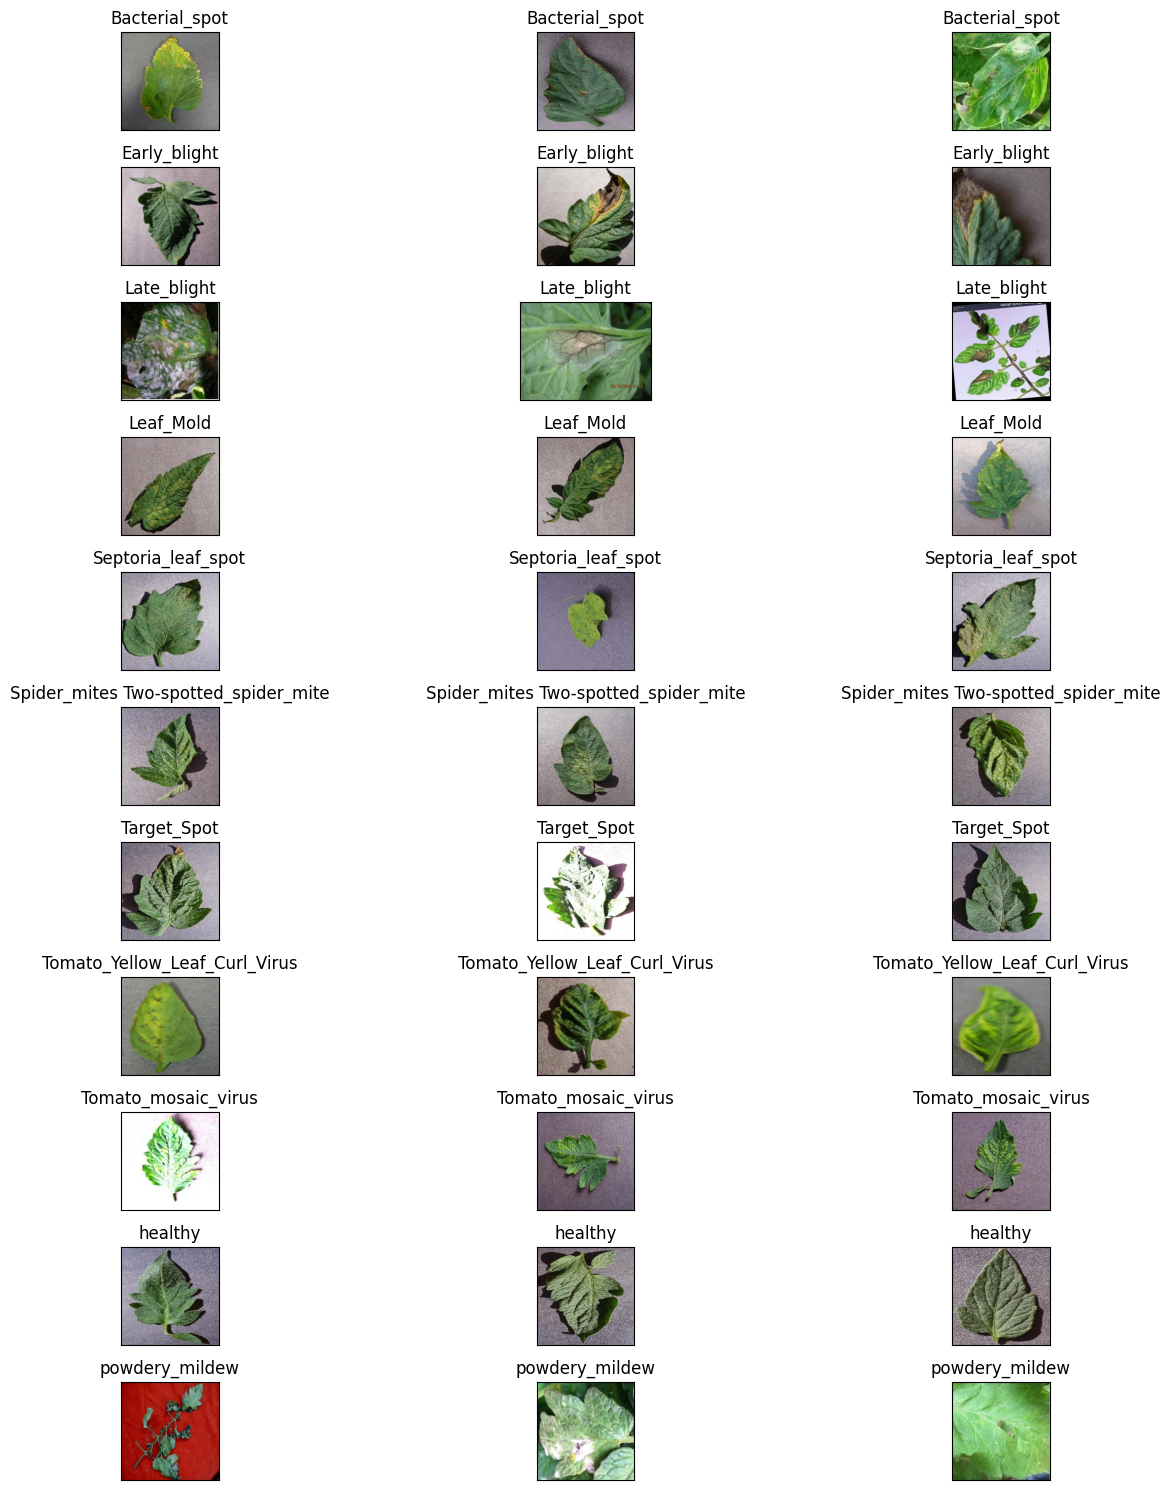

In [10]:
import matplotlib.image as mpimg


fig = plt.figure(figsize=(15, 15))
for i in range(1, num_rows * images_per_row + 1):
    fig.add_subplot(num_rows, images_per_row, i)
    plt.imshow(mpimg.imread(df_sample.iloc[i - 1]['full_path']))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"{df_sample.iloc[i - 1]['class_name']}")

plt.tight_layout()
plt.show()

# Model

In [11]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Define metaparameters

In [13]:
target_size = (299, 299)
input_shape = target_size + (3,)
batch_size = 32
num_classes = df['class_name'].nunique()

learning_rate = 0.01
epochs = 10


### Load images using ImageDataGenerator

In [14]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    folder_train,
    target_size=target_size,
    batch_size=batch_size
)

Found 25851 images belonging to 11 classes.


In [15]:
train_ds.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8,
 'healthy': 9,
 'powdery_mildew': 10}

In [16]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    folder_valid,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False
)

Found 6683 images belonging to 11 classes.


### Model 1. Xception

In [18]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

base_model.trainable = False



inputs = keras.Input(shape=input_shape)

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(num_classes)(vectors)

model = keras.Model(inputs, outputs)

2023-12-18 01:53:33.999280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node

Your kernel may have been built without NUMA support.

2023-12-18 01:53:33.999694: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

Skipping registering GPU devices...


In [19]:
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

### Train the model. Below is the output using the small dataset

In [20]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10

18/18 [==============================] - 18s 889ms/step - loss: 2.6239 - accuracy: 0.3182 - val_loss: 2.5471 - val_accuracy: 0.3964

Epoch 2/10

18/18 [==============================] - 15s 869ms/step - loss: 1.0539 - accuracy: 0.6745 - val_loss: 1.8415 - val_accuracy: 0.5164

Epoch 3/10

18/18 [==============================] - 16s 951ms/step - loss: 0.5305 - accuracy: 0.8291 - val_loss: 1.6734 - val_accuracy: 0.5745

Epoch 4/10

18/18 [==============================] - 16s 910ms/step - loss: 0.3390 - accuracy: 0.9000 - val_loss: 1.6598 - val_accuracy: 0.5600

Epoch 5/10

18/18 [==============================] - 16s 877ms/step - loss: 0.2476 - accuracy: 0.9327 - val_loss: 1.6120 - val_accuracy: 0.5527

Epoch 6/10

18/18 [==============================] - 16s 903ms/step - loss: 0.1835 - accuracy: 0.9691 - val_loss: 1.6942 - val_accuracy: 0.5600

Epoch 7/10

18/18 [==============================] - 16s 883ms/step - loss: 0.1426 - accuracy: 0.9836 - val_loss: 1.5909 - val_acc

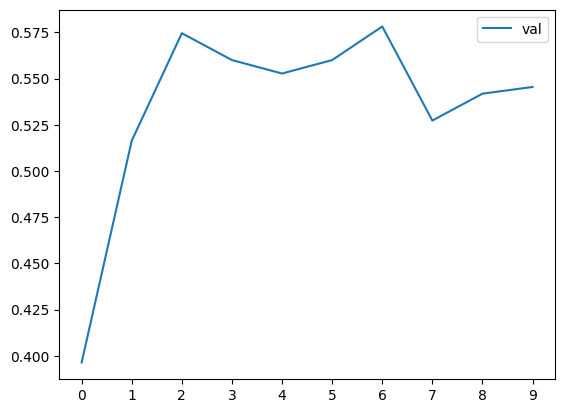

In [21]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(epochs))
plt.legend()

### Model 2. Tune Learning rate

In [24]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=input_shape)
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(num_classes)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [25]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001

Epoch 1/10

18/18 [==============================] - 17s 863ms/step - loss: 2.4975 - accuracy: 0.1018 - val_loss: 2.4154 - val_accuracy: 0.1236

Epoch 2/10

18/18 [==============================] - 15s 832ms/step - loss: 2.3670 - accuracy: 0.1400 - val_loss: 2.3346 - val_accuracy: 0.1673

Epoch 3/10

18/18 [==============================] - 15s 833ms/step - loss: 2.2756 - accuracy: 0.1745 - val_loss: 2.2779 - val_accuracy: 0.1927

Epoch 4/10

18/18 [==============================] - 15s 822ms/step - loss: 2.1975 - accuracy: 0.2382 - val_loss: 2.2257 - val_accuracy: 0.2182

Epoch 5/10

18/18 [==============================] - 14s 784ms/step - loss: 2.1276 - accuracy: 0.2873 - val_loss: 2.1783 - val_accuracy: 0.2364

Epoch 6/10

18/18 [==============================] - 14s 785ms/step - loss: 2.0590 - accuracy: 0.3309 - val_loss: 2.1345 - val_accuracy: 0.2618

Epoch 7/10

18/18 [==============================] - 15s 825ms/step - loss: 1.9982 - accuracy: 0.3582 - val_loss: 2.0929 -

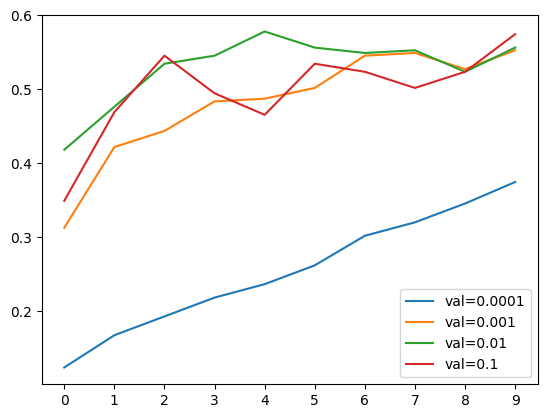

In [26]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(epochs))
plt.legend()

### Choose lr=0.01. The training was done using the small dataset

In [27]:
learning_rate = 0.01

### Define checkpoint to save the best model

In [17]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

### Add an inner dense layer and tune it using different inner size

In [29]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=input_shape)
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(num_classes)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [30]:
scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10

Epoch 1/10

18/18 [==============================] - 17s 852ms/step - loss: 2.3831 - accuracy: 0.1127 - val_loss: 2.3402 - val_accuracy: 0.1345

Epoch 2/10

18/18 [==============================] - 14s 780ms/step - loss: 2.1798 - accuracy: 0.2145 - val_loss: 2.2772 - val_accuracy: 0.2000

Epoch 3/10

18/18 [==============================] - 15s 821ms/step - loss: 2.0623 - accuracy: 0.2455 - val_loss: 2.2742 - val_accuracy: 0.2327

Epoch 4/10

18/18 [==============================] - 15s 844ms/step - loss: 1.9740 - accuracy: 0.3036 - val_loss: 2.2444 - val_accuracy: 0.2727

Epoch 5/10

18/18 [==============================] - 16s 866ms/step - loss: 1.8137 - accuracy: 0.3655 - val_loss: 2.1044 - val_accuracy: 0.2655

Epoch 6/10

18/18 [==============================] - 15s 814ms/step - loss: 1.7214 - accuracy: 0.3909 - val_loss: 2.1720 - val_accuracy: 0.2655

Epoch 7/10

18/18 [==============================] - 16s 916ms/step - loss: 1.6397 - accuracy: 0.3964 - val_loss: 2.1722 - val

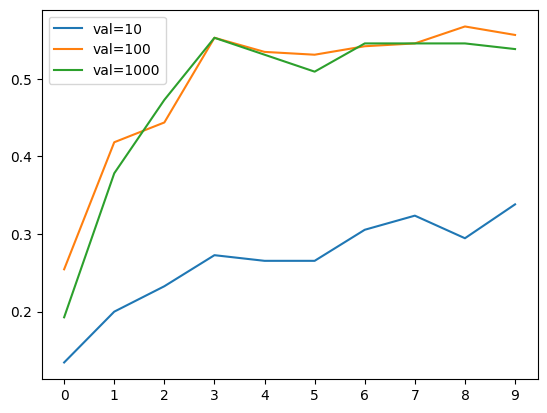

In [31]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(epochs))
plt.legend()

### In the previous step I selected inner size = 100. Now add a dropout layer

In [18]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=input_shape)
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(num_classes)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

### Dropout = 0.2

In [19]:
learning_rate = 0.01
size = 100

scores = {}

for droprate in [0.2]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=epochs*2, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history

    print()
    print()

0.2
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/20
808/808 [==============================] - ETA: 0s - loss: 0.9903 - accuracy: 0.6596

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


808/808 [==============================] - 285s 333ms/step - loss: 0.9903 - accuracy: 0.6596 - val_loss: 0.5783 - val_accuracy: 0.8062
Epoch 2/20
808/808 [==============================] - 227s 280ms/step - loss: 0.7037 - accuracy: 0.7553 - val_loss: 0.4559 - val_accuracy: 0.8505
Epoch 3/20
808/808 [==============================] - 225s 278ms/step - loss: 0.6252 - accuracy: 0.7820 - val_loss: 0.5082 - val_accuracy: 0.8249
Epoch 4/20
808/808 [==============================] - 228s 281ms/step - loss: 0.5603 - accuracy: 0.8088 - val_loss: 0.4226 - val_accuracy: 0.8583
Epoch 5/20
808/808 [==============================] - 225s 278ms/step - loss: 0.5040 - accuracy: 0.8243 - val_loss: 0.4138 - val_accuracy: 0.8751
Epoch 6/20
808/808 [==============================] - 224s 278ms/step - loss: 0.4844 - accuracy: 0.8309 - val_loss: 0.4807 - val_accuracy: 0.8424
Epoch 7/20
808/808 [==============================] - 229s 283ms/step - loss: 0.4567 - accuracy: 0.8391 - val_loss: 0.3979 - val_accura

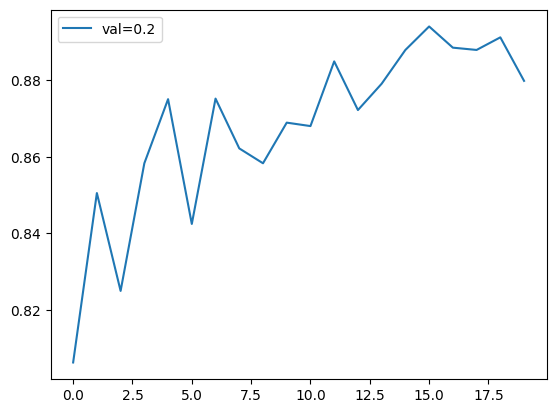

In [20]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

### Dropout = 0.4

In [21]:
learning_rate = 0.01
size = 100

for droprate in [0.4]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=epochs*3, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history

    print()
    print()

0.4
Epoch 1/30
808/808 [==============================] - 229s 279ms/step - loss: 1.2415 - accuracy: 0.5671 - val_loss: 0.6580 - val_accuracy: 0.7755
Epoch 2/30
808/808 [==============================] - 223s 276ms/step - loss: 0.9691 - accuracy: 0.6596 - val_loss: 0.5825 - val_accuracy: 0.8010
Epoch 3/30
808/808 [==============================] - 225s 279ms/step - loss: 0.8875 - accuracy: 0.6880 - val_loss: 0.6289 - val_accuracy: 0.7977
Epoch 4/30
808/808 [==============================] - 224s 277ms/step - loss: 0.8403 - accuracy: 0.7054 - val_loss: 0.5219 - val_accuracy: 0.8281
Epoch 5/30
808/808 [==============================] - 225s 278ms/step - loss: 0.7843 - accuracy: 0.7228 - val_loss: 0.5593 - val_accuracy: 0.8145
Epoch 6/30
808/808 [==============================] - 226s 279ms/step - loss: 0.7620 - accuracy: 0.7332 - val_loss: 0.5050 - val_accuracy: 0.8367
Epoch 7/30
808/808 [==============================] - 226s 280ms/step - loss: 0.7340 - accuracy: 0.7430 - val_loss: 0.47

## After playing with the number of epochs and dropout value I reached val_accuracy = 0.898. The model was saved to xception_v1_12_0.898.h5 and then converted to the saved model